In [2]:
!pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   -------- ------------------------------- 3.9/19.1 MB 19.5 MB/s eta 0:00:01
   ------------------- -------------------- 9.2/19.1 MB 22.8 MB/s eta 0:00:01
   ------------------------------ --------- 14.7/19.1 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 24.8 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 23.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [5]:
import pandas as pd

# CSV 파일 로드 (파일명은 필요에 맞게 수정)
data = pd.read_csv("../googledrive/data/meteorological.csv")

# 데이터의 시간 컬럼을 datetime 형식으로 변환
data['tm'] = pd.to_datetime(data['tm'])

# 계절 구분 함수
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# 시간대 구분 함수
def get_time_period(hour):
    if hour in [0, 1, 2]:
        return 'Night'
    elif hour in [12, 13, 14]:
        return 'Day'
    else:
        return None

# 계절 및 시간대 컬럼 추가
data['Season'] = data['tm'].dt.month.apply(get_season)
data['TimePeriod'] = data['tm'].dt.hour.apply(get_time_period)

# 필요한 데이터만 필터링 (유효한 온도, 시간대만 포함)
data_filtered = data[(data['TimePeriod'].notnull()) & (data['ta'].notnull())]

# 계절 및 시간대별 평균 온도 계산
seasonal_temp = data_filtered.groupby(['Season', 'TimePeriod'])['ta'].mean().reset_index()

# 결과 출력
print(seasonal_temp)



C:\Users\Jongho\AppData\Local\Temp\ipykernel_8180\3862157537.py:4: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../googledrive/data/meteorological.csv")


   Season TimePeriod         ta
0    Fall        Day  19.716105
1    Fall      Night  13.297397
2  Spring        Day  16.198671
3  Spring      Night   8.441535
4  Summer        Day  26.974054
5  Summer      Night  21.843407
6  Winter        Day   2.902751
7  Winter      Night  -1.930406


C:\Users\Jongho\AppData\Local\Temp\ipykernel_8180\239128327.py:5: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../googledrive/data/meteorological.csv")


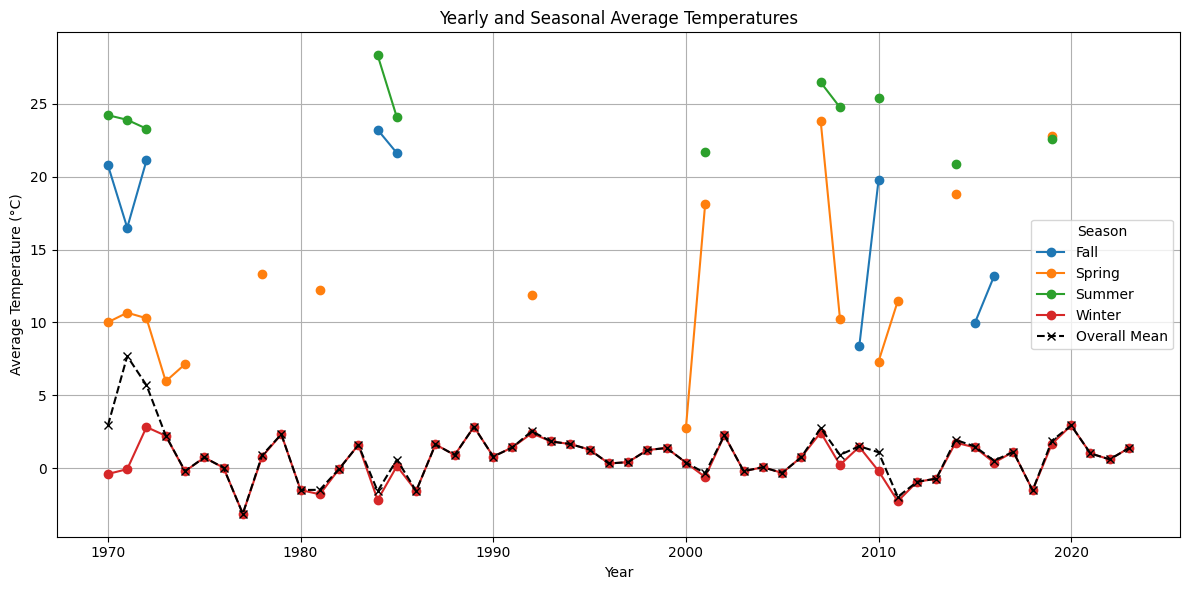

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드 (파일명은 필요에 맞게 수정)
data = pd.read_csv("../googledrive/data/meteorological.csv")

# 데이터의 시간 컬럼을 datetime 형식으로 변환
data['tm'] = pd.to_datetime(data['tm'])

# 계절 구분 함수
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# 시간대 구분 함수
def get_time_period(hour):
    if hour in [0, 1, 2, 3]:
        return 'Night'
    elif hour in [12, 13, 14, 15]:
        return 'Day'
    else:
        return None

# 계절 및 시간대 컬럼 추가
data['Season'] = data['tm'].dt.month.apply(get_season)
data['TimePeriod'] = data['tm'].dt.hour.apply(get_time_period)
data['Year'] = data['tm'].dt.year

# 필요한 데이터만 필터링 (유효한 온도, 시간대만 포함)
data_filtered = data[(data['TimePeriod'].notnull()) & (data['ta'].notnull())]

# 계절 및 연도별 평균 온도 계산
seasonal_temp = data_filtered.groupby(['Year', 'Season'])['ta'].mean().reset_index()
overall_temp = data_filtered.groupby('Year')['ta'].mean().reset_index()
overall_temp.rename(columns={'ta': 'OverallMean'}, inplace=True)

# 데이터 병합
merged_temp = pd.merge(seasonal_temp, overall_temp, on='Year')

# 그래프 생성
plt.figure(figsize=(12, 6))

# 계절별 데이터 플롯
temp_pivot = merged_temp.pivot(index='Year', columns='Season', values='ta')
temp_pivot.plot(ax=plt.gca(), marker='o')

# 전체 평균 데이터 플롯
plt.plot(overall_temp['Year'], overall_temp['OverallMean'], label='Overall Mean', linestyle='--', color='black', marker='x')

# 그래프 설정
plt.title('Yearly and Seasonal Average Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Season')
plt.grid()

# 그래프 표시
plt.tight_layout()
plt.show()


C:\Users\Jongho\AppData\Local\Temp\ipykernel_8180\1574695891.py:5: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../googledrive/data/meteorological.csv")


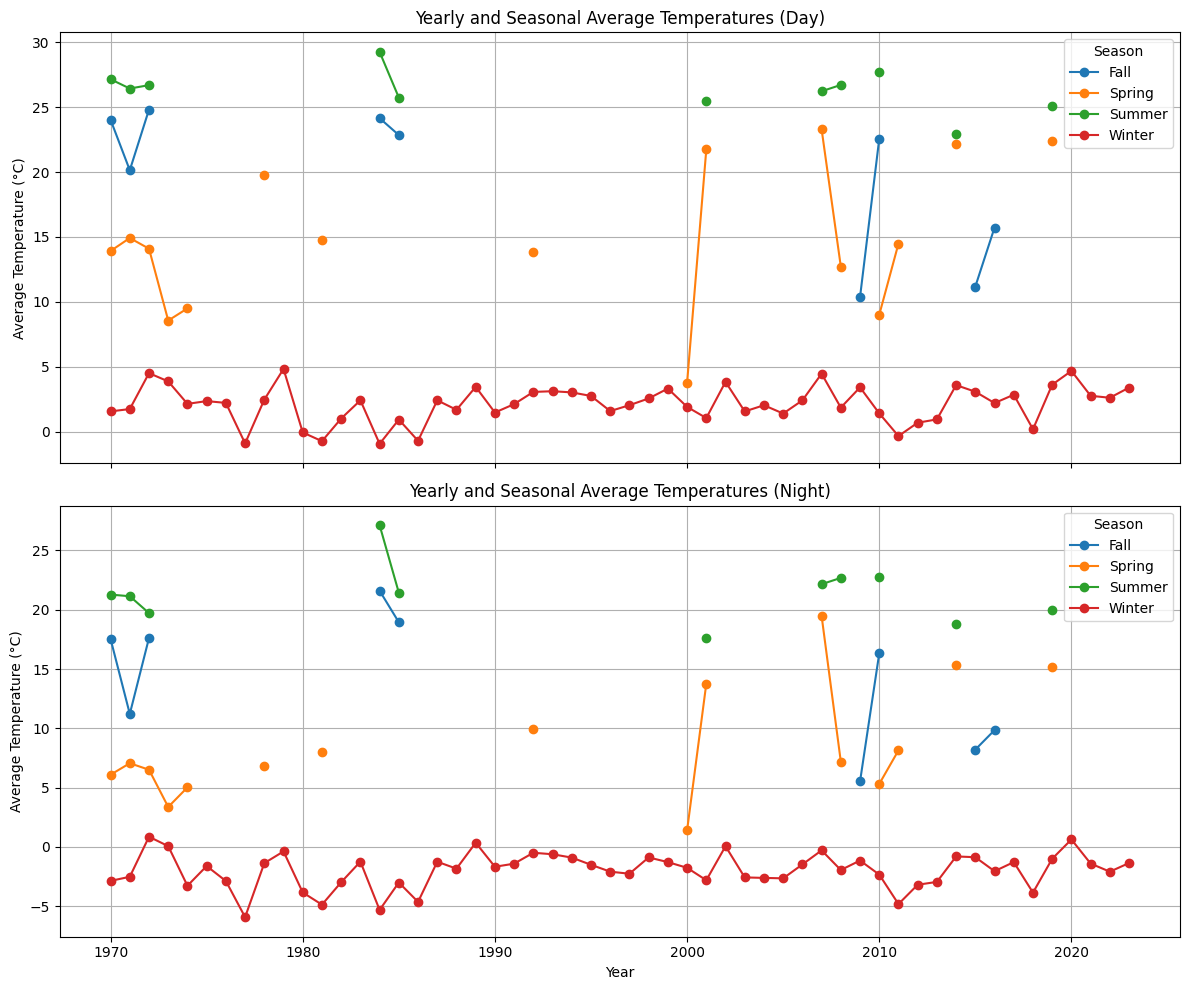

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드 (파일명은 필요에 맞게 수정)
data = pd.read_csv("../googledrive/data/meteorological.csv")

# 데이터의 시간 컬럼을 datetime 형식으로 변환
data['tm'] = pd.to_datetime(data['tm'])

# 계절 구분 함수
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# 시간대 구분 함수
def get_time_period(hour):
    if hour in [22, 23, 0, 1, 2, 3]:
        return 'Night'
    elif hour in [10, 11, 12, 13, 14, 15]:
        return 'Day'
    else:
        return None

# 계절 및 시간대 컬럼 추가
data['Season'] = data['tm'].dt.month.apply(get_season)
data['TimePeriod'] = data['tm'].dt.hour.apply(get_time_period)
data['Year'] = data['tm'].dt.year

# 필요한 데이터만 필터링 (유효한 온도, 시간대만 포함)
data_filtered = data[(data['TimePeriod'].notnull()) & (data['ta'].notnull())]

# 계절 및 연도별 평균 온도 계산 (낮과 밤으로 구분)
day_night_temp = data_filtered.groupby(['Year', 'Season', 'TimePeriod'])['ta'].mean().reset_index()

# 낮과 밤 데이터 분리
day_temp = day_night_temp[day_night_temp['TimePeriod'] == 'Day']
night_temp = day_night_temp[day_night_temp['TimePeriod'] == 'Night']

# 그래프 생성
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 낮 평균 온도 그래프
day_pivot = day_temp.pivot(index='Year', columns='Season', values='ta')
day_pivot.plot(ax=axes[0], marker='o')
axes[0].set_title('Yearly and Seasonal Average Temperatures (Day)')
axes[0].set_ylabel('Average Temperature (°C)')
axes[0].legend(title='Season')
axes[0].grid()

# 밤 평균 온도 그래프
night_pivot = night_temp.pivot(index='Year', columns='Season', values='ta')
night_pivot.plot(ax=axes[1], marker='o')
axes[1].set_title('Yearly and Seasonal Average Temperatures (Night)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Temperature (°C)')
axes[1].legend(title='Season')
axes[1].grid()

# 그래프 표시
plt.tight_layout()
plt.show()


In [12]:
# 계절별 데이터 개수 확인
data_filtered.groupby(['Season', 'Year'])['ta'].count()


Season  Year
Fall    1970       76
        1971      835
        1972       33
        1984      193
        1985      112
                ...  
Winter  2019    47054
        2020    48700
        2021    47584
        2022    47539
        2023    47571
Name: ta, Length: 90, dtype: int64

In [13]:
# 계절별 데이터 샘플링
print(data_filtered[data_filtered['Season'] == 'Spring'].head())
print(data_filtered[data_filtered['Season'] == 'Summer'].head())
print(data_filtered[data_filtered['Season'] == 'Fall'].head())


                        tm  rnum  stnId stnNm   ta  taQcflg  rn  rnQcflg  ws  \
106205 2000-03-01 00:00:00   687    102   백령도  0.6      0.0 NaN      NaN NaN   
106206 2000-03-01 01:00:00   688    102   백령도  0.8      0.0 NaN      NaN NaN   
106207 2000-03-01 02:00:00   689    102   백령도  0.9      0.0 NaN      NaN NaN   
106208 2000-03-01 03:00:00   690    102   백령도  1.0      0.0 NaN      NaN NaN   
106215 2000-03-01 10:00:00   697    102   백령도  2.7      0.0 NaN      NaN NaN   

        wsQcflg  ...  dmstMtphNo   ts  tsQcflg  m005Te  m01Te  m02Te  m03Te  \
106205      NaN  ...         NaN  NaN      9.0     NaN    NaN    NaN    NaN   
106206      NaN  ...         NaN  NaN      9.0     NaN    NaN    NaN    NaN   
106207      NaN  ...         NaN  NaN      9.0     NaN    NaN    NaN    NaN   
106208      NaN  ...         NaN -1.2      0.0     NaN    NaN    NaN    NaN   
106215      NaN  ...         NaN  NaN      9.0     NaN    NaN    NaN    NaN   

        Season  TimePeriod  Year  
106205  S

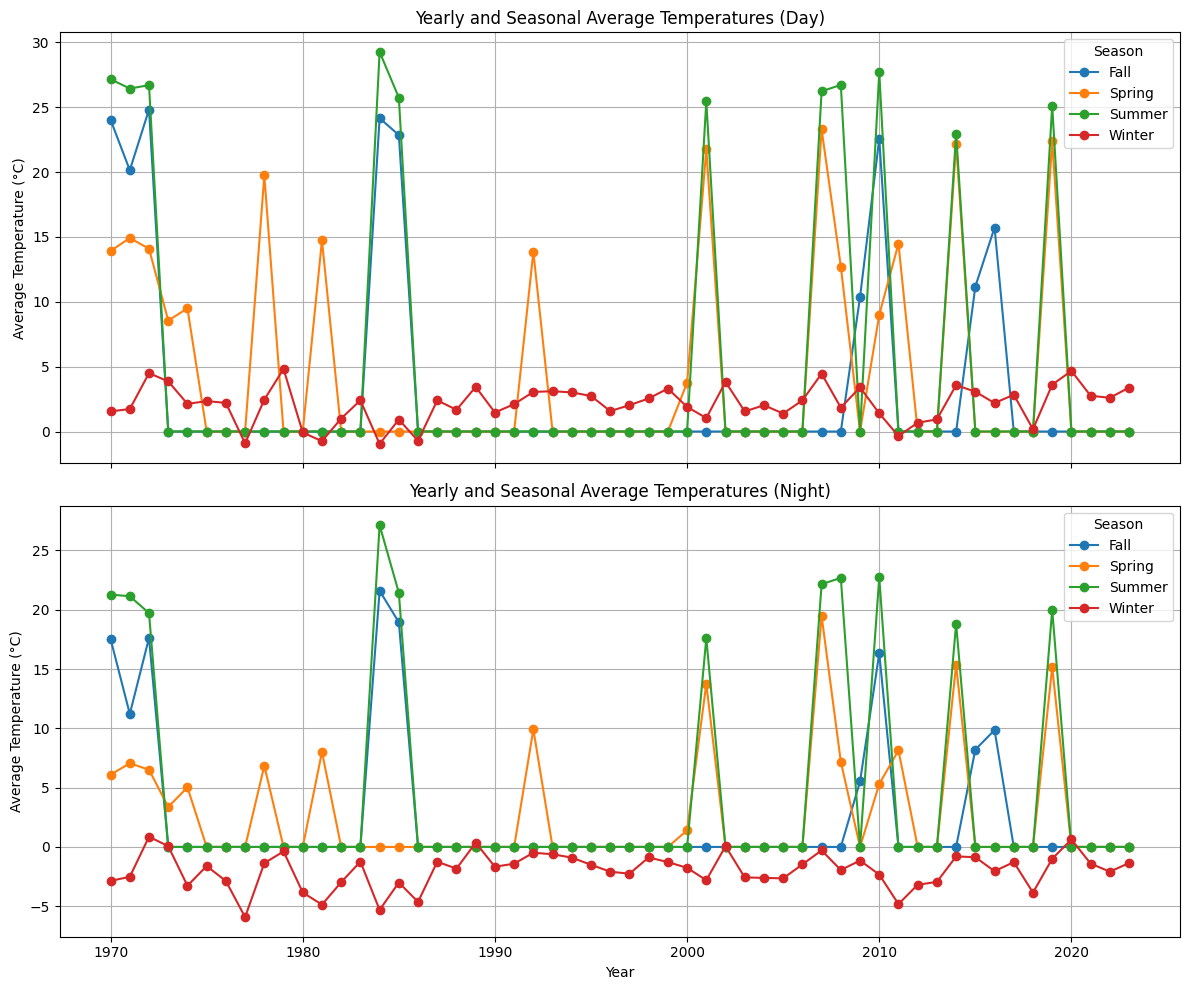

In [14]:
# 모든 연도와 계절의 조합 생성
import itertools
all_years = data_filtered['Year'].unique()
all_seasons = ['Spring', 'Summer', 'Fall', 'Winter']
all_combinations = pd.DataFrame(list(itertools.product(all_years, all_seasons)), columns=['Year', 'Season'])

# 계절별 평균 온도 데이터와 병합
seasonal_temp_full = pd.merge(all_combinations, seasonal_temp, on=['Year', 'Season'], how='left')

# 결측치를 0으로 처리하거나 제외하지 않고 유지
seasonal_temp_full['ta'] = seasonal_temp_full['ta'].fillna(0)


# 낮/밤 모든 조합 생성
all_combinations_day_night = pd.DataFrame(
    list(itertools.product(all_years, all_seasons, ['Day', 'Night'])),
    columns=['Year', 'Season', 'TimePeriod']
)

# 낮/밤 데이터와 병합
day_night_temp_full = pd.merge(all_combinations_day_night, day_night_temp, on=['Year', 'Season', 'TimePeriod'], how='left')
day_night_temp_full['ta'] = day_night_temp_full['ta'].fillna(0)


# 낮 평균 온도 그래프
day_temp = day_night_temp_full[day_night_temp_full['TimePeriod'] == 'Day']
day_pivot = day_temp.pivot(index='Year', columns='Season', values='ta')

# 밤 평균 온도 그래프
night_temp = day_night_temp_full[day_night_temp_full['TimePeriod'] == 'Night']
night_pivot = night_temp.pivot(index='Year', columns='Season', values='ta')

# 그래프 생성
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 낮 그래프
day_pivot.plot(ax=axes[0], marker='o')
axes[0].set_title('Yearly and Seasonal Average Temperatures (Day)')
axes[0].set_ylabel('Average Temperature (°C)')
axes[0].legend(title='Season')
axes[0].grid()

# 밤 그래프
night_pivot.plot(ax=axes[1], marker='o')
axes[1].set_title('Yearly and Seasonal Average Temperatures (Night)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Temperature (°C)')
axes[1].legend(title='Season')
axes[1].grid()

# 그래프 표시
plt.tight_layout()
plt.show()


C:\Users\Jongho\AppData\Local\Temp\ipykernel_8180\3845152778.py:5: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../googledrive/data/meteorological.csv")


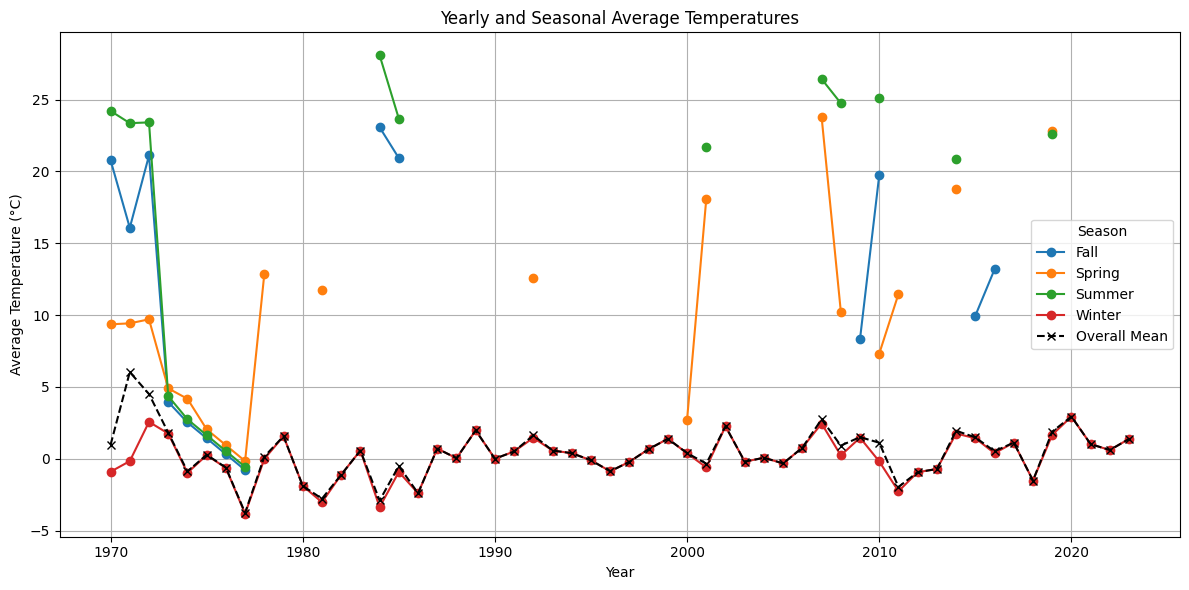

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드 (파일명은 필요에 맞게 수정)
data = pd.read_csv("../googledrive/data/meteorological.csv")

# 데이터의 시간 컬럼을 datetime 형식으로 변환
data['tm'] = pd.to_datetime(data['tm'])

# 결측치 처리 (선형 보간 및 기타 방법)
data['ta'] = data['ta'].interpolate(method='linear', limit_direction='both')

# 계절 구분 함수
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# 시간대 구분 함수
def get_time_period(hour):
    if hour in [0, 1, 2, 3]:
        return 'Night'
    elif hour in [12, 13, 14, 15]:
        return 'Day'
    else:
        return None

# 계절 및 시간대 컬럼 추가
data['Season'] = data['tm'].dt.month.apply(get_season)
data['TimePeriod'] = data['tm'].dt.hour.apply(get_time_period)
data['Year'] = data['tm'].dt.year

# 필요한 데이터만 필터링 (유효한 온도, 시간대만 포함)
data_filtered = data[(data['TimePeriod'].notnull()) & (data['ta'].notnull())]

# 계절 및 연도별 평균 온도 계산
seasonal_temp = data_filtered.groupby(['Year', 'Season'])['ta'].mean().reset_index()
overall_temp = data_filtered.groupby('Year')['ta'].mean().reset_index()
overall_temp.rename(columns={'ta': 'OverallMean'}, inplace=True)

# 데이터 병합
merged_temp = pd.merge(seasonal_temp, overall_temp, on='Year')

# 그래프 생성
plt.figure(figsize=(12, 6))

# 계절별 데이터 플롯
temp_pivot = merged_temp.pivot(index='Year', columns='Season', values='ta')
temp_pivot.plot(ax=plt.gca(), marker='o')

# 전체 평균 데이터 플롯
plt.plot(overall_temp['Year'], overall_temp['OverallMean'], label='Overall Mean', linestyle='--', color='black', marker='x')

# 그래프 설정
plt.title('Yearly and Seasonal Average Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Season')
plt.grid()

# 그래프 표시
plt.tight_layout()
plt.show()


In [16]:

df = pd.read_csv("../googledrive/data/meteorological.csv")

C:\Users\Jongho\AppData\Local\Temp\ipykernel_8180\1632632748.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../googledrive/data/meteorological.csv")


C:\Users\Jongho\AppData\Local\Temp\ipykernel_8180\4092651668.py:5: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../googledrive/data/meteorological.csv")


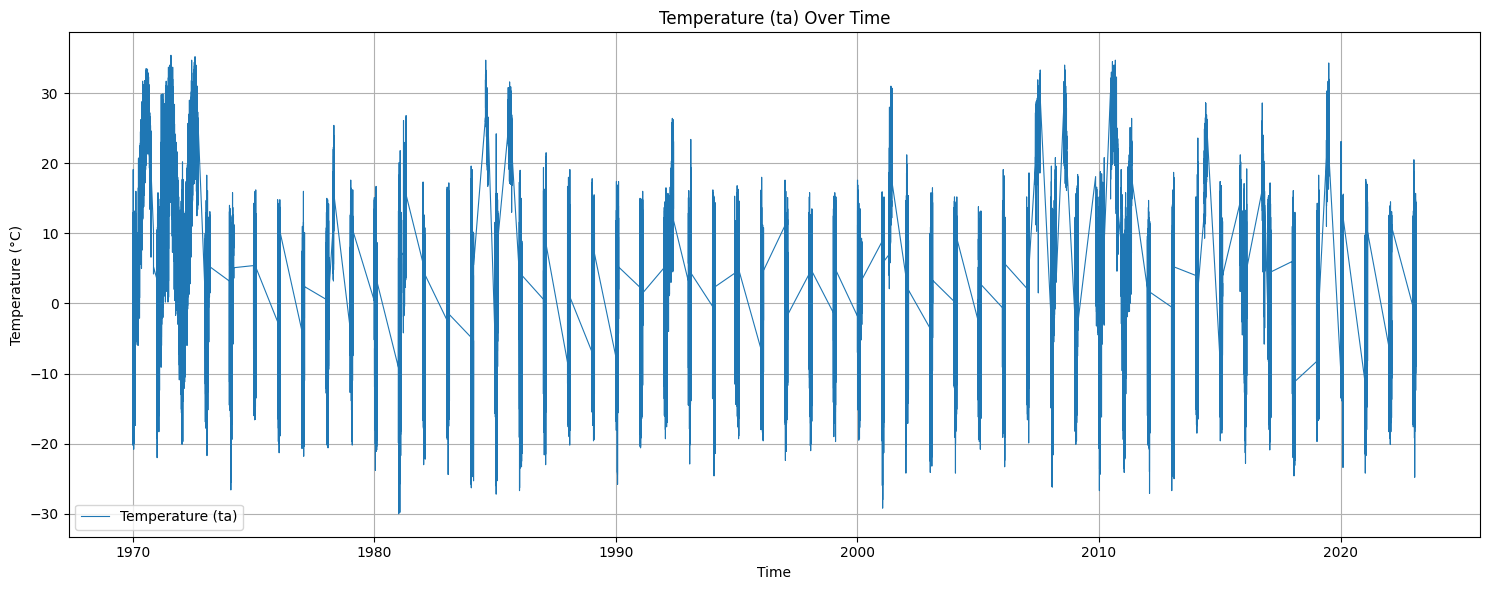

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (파일명은 필요에 맞게 수정)
df = pd.read_csv("../googledrive/data/meteorological.csv")

# 결측치 제거
df = df.dropna(subset=['ta'])

# 시간 데이터를 datetime 형식으로 변환
df['tm'] = pd.to_datetime(df['tm'])

# 시간 순서대로 정렬
df = df.sort_values(by='tm')

# 그래프 생성
plt.figure(figsize=(15, 6))
plt.plot(df['tm'], df['ta'], label='Temperature (ta)', linewidth=0.8)

# 그래프 설정
plt.title('Temperature (ta) Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
